### Import wine data

For each year (VINT), the following statistics are recorded:
* LPRICE – wine value (logarithmically transformed)*
* WRAIN – Winter rain quantity
* DEGREES – average temperature in Celsius
* HRAIN – harvest rain quantity
* TIME_SV – Time series index

\* Log transformation is done to reduce skewness in price distribution and to distinguish signal from noise in the light tails

For more info on plot point styling, click [here](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r).

'data.frame':	38 obs. of  6 variables:
 $ VINT   : int  1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 ...
 $ LPRICE : num  -0.999 -0.454 NA -0.808 NA ...
 $ WRAIN  : int  600 690 430 502 440 420 582 485 763 830 ...
 $ DEGREES: num  17.1 16.7 15.4 17.1 15.7 ...
 $ HRAIN  : int  160 80 180 130 140 110 187 187 290 38 ...
 $ TIME_SV: int  31 30 29 28 27 26 25 24 23 22 ...


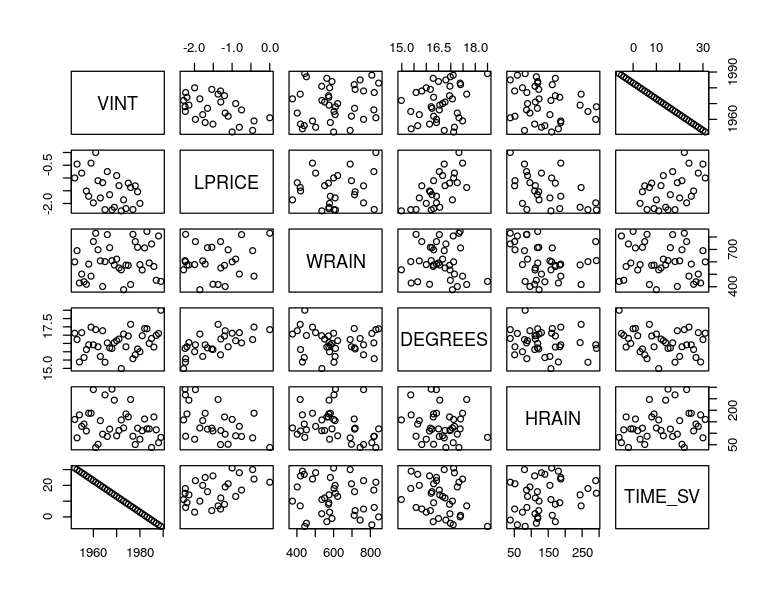

In [17]:
options(repr.plot.width=6.5, repr.plot.height=5) # resize IRkernel plot size

wine <- read.csv("csv/wine.csv")
str(wine)
# summary(wine)
pairs(wine) # gives scatter plot of all possible factor combinations

# define disjoint training & validation datasets
winetrain <- subset(wine, wine$VINT <= 1978) # training set
winetest <- subset(wine, wine$VINT > 1978) # validation set

Note that residual standard error refers to the $\sqrt{MSE}$ of the regression:
$$MSE = \sigma^2 = s^2 = \frac{SSE}{n-p}$$
where $n=$ sample size, $p=$ number of predictors (includes intercept), residual $dF=n-p$ 

Recall $SST=SSE+SSR$. For a single variable (factor $k$) regression, $p=2=k+1$

$$n-p = n-k-1$$


Call:
lm(formula = LPRICE ~ VINT, data = winetrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84574 -0.46266 -0.09462  0.48752  1.24478 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 72.99301   30.98789   2.356   0.0274 *
VINT        -0.03786    0.01576  -2.402   0.0248 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.594 on 23 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2005,	Adjusted R-squared:  0.1657 
F-statistic: 5.768 on 1 and 23 DF,  p-value: 0.0248


[1] 0.2004897 0.1657284
[1] 25


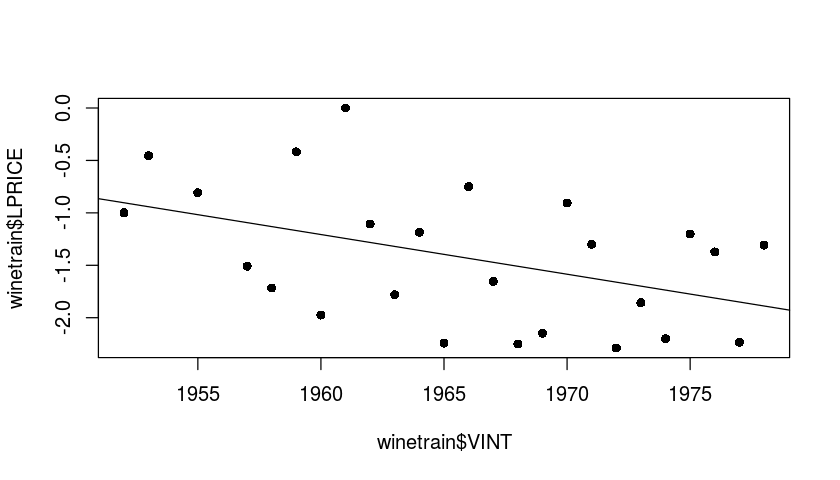

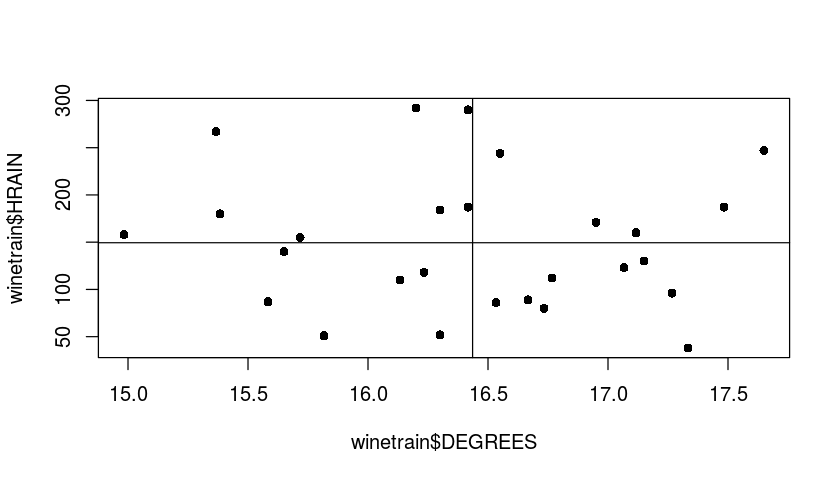

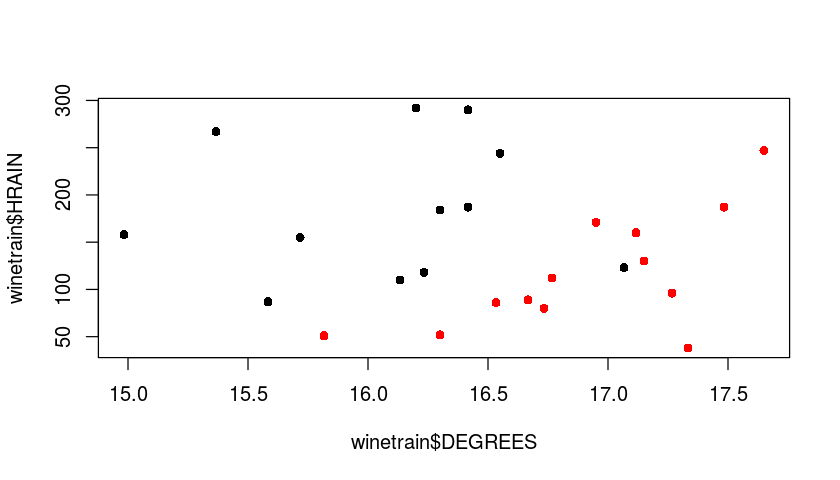

In [48]:
options(repr.plot.width=7, repr.plot.height=4) # resize IRkernel plot size

# 1-VAR (2-PRED) linear regression
model1 <- lm(LPRICE~VINT, data=winetrain) # lm(Y~X, dataframe_object)
summary(model1)
plot(winetrain$VINT, winetrain$LPRICE, pch=16)
abline(model1)
# abline(a=mean(winetrain$LPRICE), b=0)

# extract r-squared value (from formula)
sse1 <- sum(model1$residuals^2)
sst1 <- sum((winetrain$LPRICE-mean(winetrain$LPRICE))^2)
rsq1 <- 1-(sse1/sst1)
rsq1 <- summary(model1)$r.squared
# extract r-squared value (from object attribute)
rsq1 <- summary(model1)$r.squared

# extract adjusted r-squared value (from formula)
rsqa1 <- 1 - ((1 - rsq1)*(nrow(model.frame(model1))-1)/(nrow(model.frame(model1))-length(coefficients(model1))))
print(c(rsq1,rsqa1))
print(nrow(model.frame(model1)))

# Plot DEGREES v. HRAIN
plot(winetrain$DEGREES, winetrain$HRAIN, pch=16) # plot(Y,X)
abline(h=mean(winetrain$HRAIN), v=mean(winetrain$DEGREES)) # gives mean point
plot(winetrain$DEGREES, winetrain$HRAIN,
     col=ifelse(winetrain$LPRICE>=mean(winetrain$LPRICE, na.rm=TRUE),"red", "black"), pch=16)

In [51]:
# 2-VAR (3-PRED) regression
model2 <- lm(LPRICE~DEGREES+HRAIN, data=winetrain)
summary(model2)

# extract (adjusted) r-squared values
rsq2 <- summary(model2)$r.squared
rsqa2 <- summary(model2)$adj.r.squared
print(c(rsq2,rsqa2))
print(nrow(model.frame(model2)))


Call:
lm(formula = LPRICE ~ DEGREES + HRAIN, data = winetrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88319 -0.19599  0.06181  0.15379  0.59724 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.69628    1.85444  -5.768 8.40e-06 ***
DEGREES       0.60261    0.11128   5.415 1.94e-05 ***
HRAIN        -0.00457    0.00101  -4.525 0.000167 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3674 on 22 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808 
F-statistic: 26.59 on 2 and 22 DF,  p-value: 1.348e-06


[1] 0.7073661 0.6807630
[1] 25


In [55]:
# N-VAR regression
modelN <- lm(LPRICE~., data=winetrain)
summary(modelN)

# N-VAR regression (discounting TIME_SV)
modelN1 <- lm(LPRICE~VINT+WRAIN+HRAIN+DEGREES, data=winetrain)
summary(modelN1)

# prediction
winepredict4 <- predict(model4, winetest, interval="confidence", level=0.95) # predicts winetest dataset on model4
#new.df <- data.frame(VINT = c(1966,1951,1988,1990))
sse4_predict4 <- sum((winetest$LPRICE[!is.na(winetest$LPRICE)]-winepredict4[1:2])^2)
sst4_predict4 <- sum((winetest$LPRICE[!is.na(winetest$LPRICE)]-mean(winetrain$LPRICE, na.rm=TRUE))^2)
r_sq_pred4 <- 1 - (sse4_predict4/sst4_predict4)
winepredict2 <- predict(model2, winetest)
sse4_predict2 <- sum((winetest$LPRICE[!is.na(winetest$LPRICE)]-winepredict2[1:2])^2)
sst4_predict2 <- sum((winetest$LPRICE[!is.na(winetest$LPRICE)]-mean(winetrain$LPRICE, na.rm=TRUE))^2)
r_sq_pred2 <- 1 - (sse4_predict2/sst4_predict2)

# compare r_sq_pred2 versus r_sq2 (we see -0.08 vs 0.70)
# we can see that even if we optimise for r^2 for a model, it may end up having an extremely poor r^2 value

# Note that residual standard error refers to the sqrt(MSE) of the regression
# Recall MSE = sigma^2 = SSE/(n-p)
# Hence, residual standard error = sample std dev
# Also, n = sample size, p = no. of predictors, residuals dF = n-p
# For 1-VAR, p=2 (intercept, x). For k-VAR(factors), p=k+1
# >> n-p = n-k-1


Call:
lm(formula = LPRICE ~ ., data = winetrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45473 -0.24276  0.00753  0.19770  0.53640 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.5297567 16.4435924   2.161 0.043028 *  
VINT        -0.0239302  0.0080969  -2.955 0.007821 ** 
WRAIN        0.0010756  0.0005073   2.120 0.046684 *  
DEGREES      0.6072099  0.0987030   6.152  5.2e-06 ***
HRAIN       -0.0039715  0.0008538  -4.652 0.000154 ***
TIME_SV             NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.295 on 20 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 
F-statistic: 24.17 on 4 and 20 DF,  p-value: 2.036e-07



Call:
lm(formula = LPRICE ~ VINT + WRAIN + HRAIN + DEGREES, data = winetrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45473 -0.24276  0.00753  0.19770  0.53640 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.5297567 16.4435924   2.161 0.043028 *  
VINT        -0.0239302  0.0080969  -2.955 0.007821 ** 
WRAIN        0.0010756  0.0005073   2.120 0.046684 *  
HRAIN       -0.0039715  0.0008538  -4.652 0.000154 ***
DEGREES      0.6072099  0.0987030   6.152  5.2e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.295 on 20 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 
F-statistic: 24.17 on 4 and 20 DF,  p-value: 2.036e-07
